In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

In [2]:
import mst_decoder as decoder
import mst_decoder.simulate as sim

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

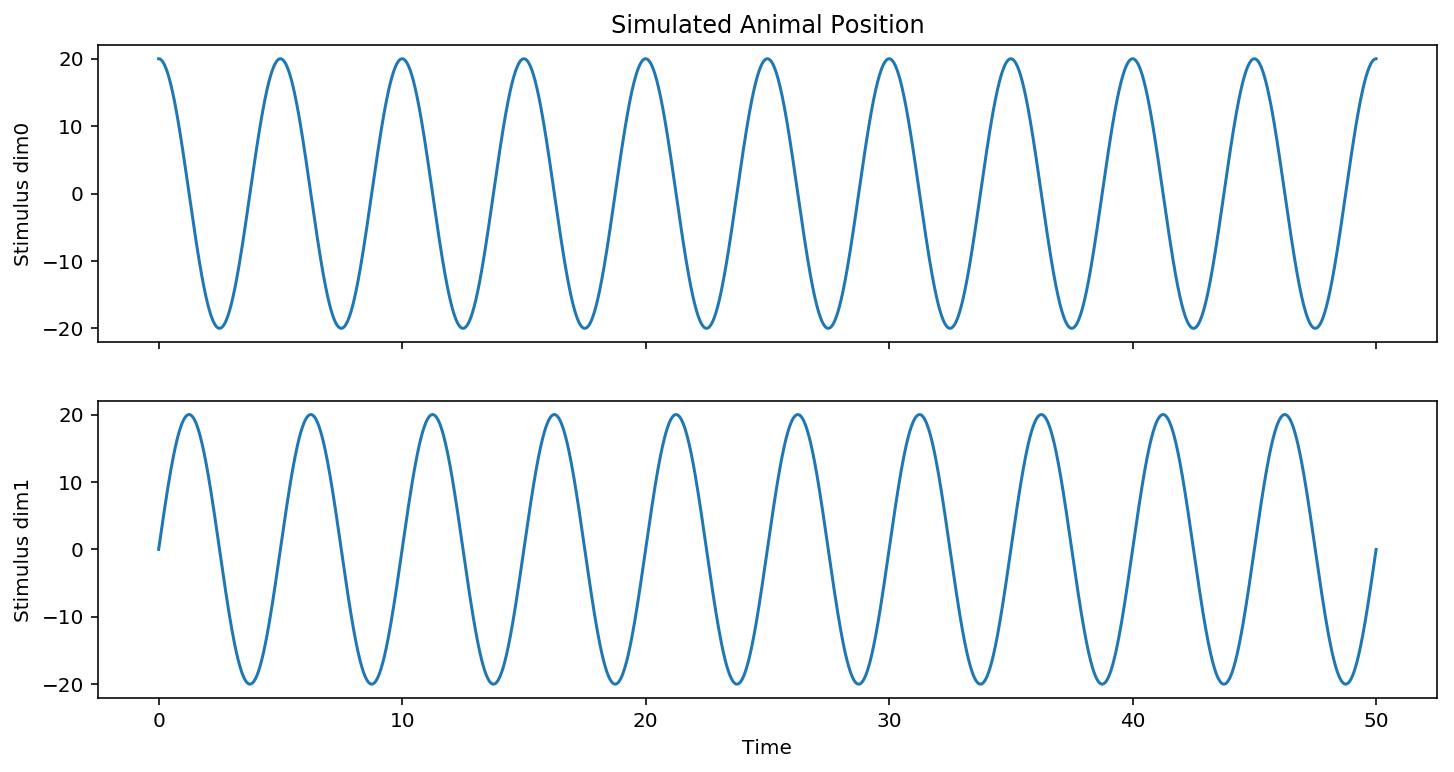

In [3]:
SAMPLING_FREQUENCY = 1500
N_SAMPLES = SAMPLING_FREQUENCY * 50

time = sim.simulate_time(N_SAMPLES, SAMPLING_FREQUENCY)
stimulus = sim.simulate_circular_cartesian(time, radius=20)

fig, axes = plt.subplots(2, 1, figsize=(12, 6), sharex=True)
axes[0].plot(time, stimulus[:, 0]);
axes[1].plot(time, stimulus[:, 1]);
axes[0].set_ylabel('Stimulus dim0')
axes[1].set_ylabel('Stimulus dim1')
axes[1].set_xlabel('Time')
axes[0].set_title('Simulated Animal Position');

/home/mz/prj/mst-decoder/mst_decoder/simulate.py:74: RuntimeWarning: Mean of empty slice
  return np.nanmean(np.stack(unit, axis=0), axis=0)


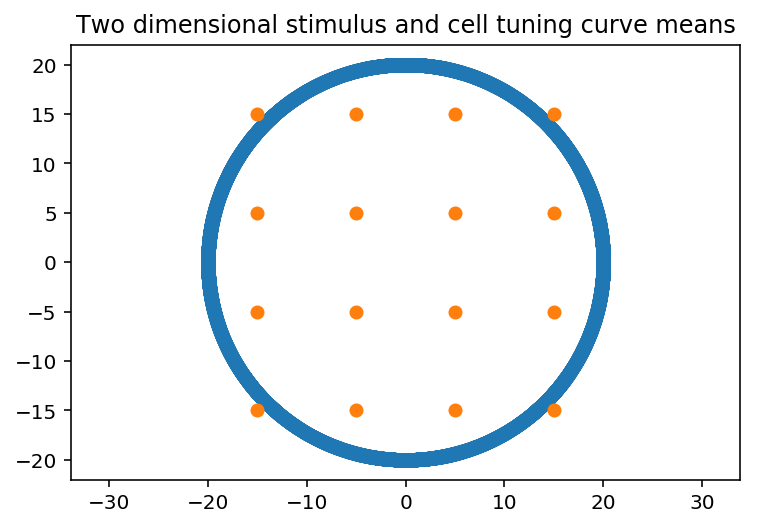

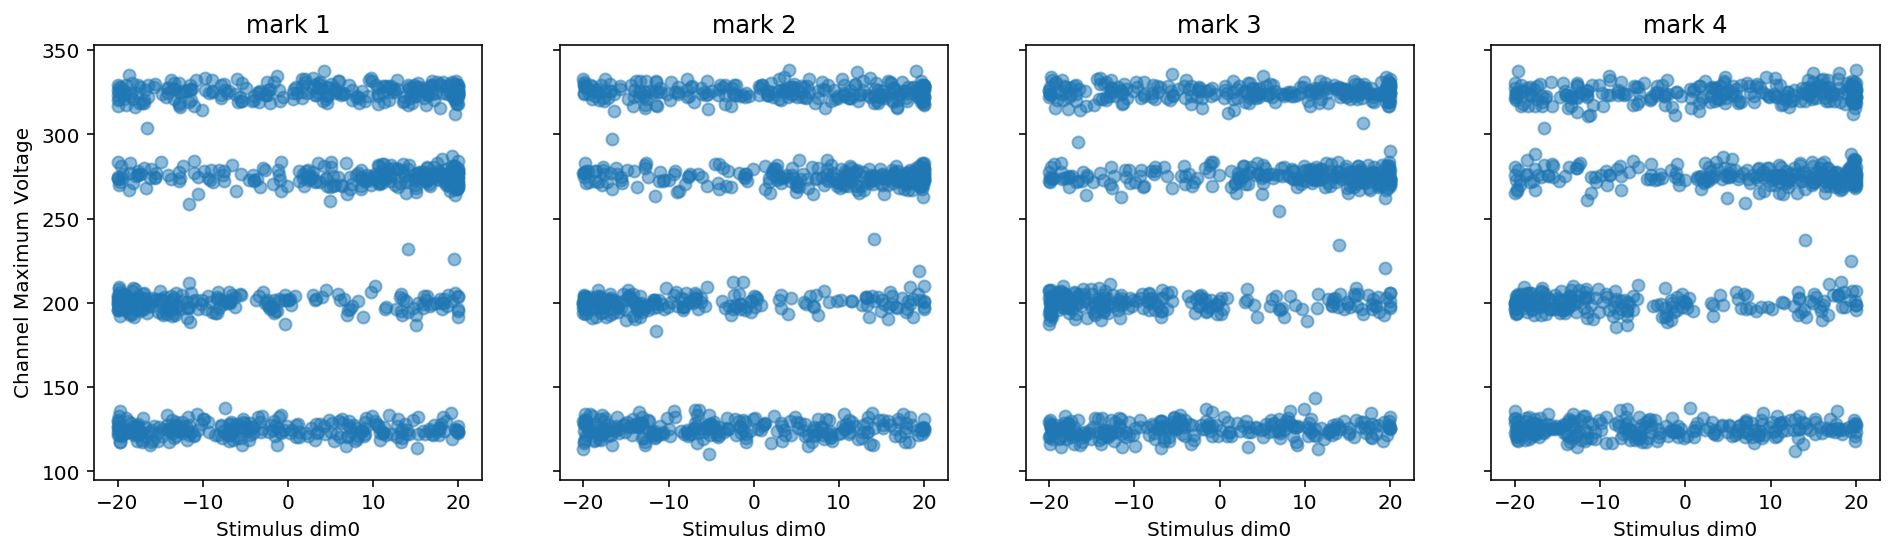

In [4]:
N_CELLS = 20

tuning_curve_means = sim.generate_gridded_tuning_curve_means(N_CELLS, stimulus)
mark_means = np.array([200, 125, 325, 275])
signal_data = [sim.simulate_multiunit(tuning_curve_means, mark_means, stimulus, SAMPLING_FREQUENCY)]

ax = plt.figure().gca()
ax.axis('equal')
ax.scatter(stimulus[:, 0], stimulus[:, 1], alpha=0.05);
ax.scatter(tuning_curve_means[:, 0], tuning_curve_means[:, 1])
ax.set_title('Two dimensional stimulus and cell tuning curve means')

for s in signal_data:
    fig, axes = plt.subplots(1, 4, sharex=True, sharey=True, figsize=(16, 4))
    for ind, (ax, m) in enumerate(zip(axes, s.T)):
        ax.scatter(stimulus[:, 0], m, alpha=0.5)
        ax.set_xlabel('Stimulus dim0')
        ax.set_title('mark {0}'.format(ind + 1))
axes[0].set_ylabel('Channel Maximum Voltage');

In [33]:
d = decoder.ClusterlessDecoder(
    stimulus=stimulus,
    spike_marks=signal_data)

# 7.38 s ± 50.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
d.fit()

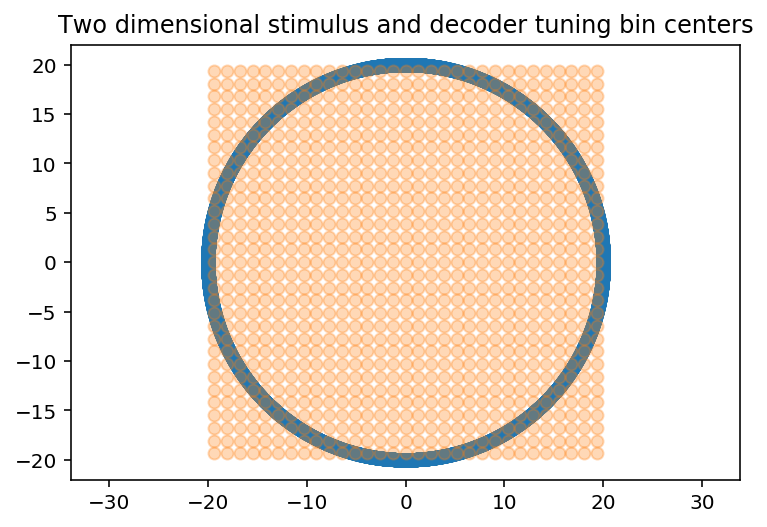

In [6]:
ax = plt.figure().gca()
ax.axis('equal')
ax.scatter(stimulus[:, 0], stimulus[:, 1], alpha=0.05);
ax.scatter(d.tuning_bin_centers[:, 0], d.tuning_bin_centers[:, 1], alpha=0.3);
ax.set_title('Two dimensional stimulus and decoder tuning bin centers');

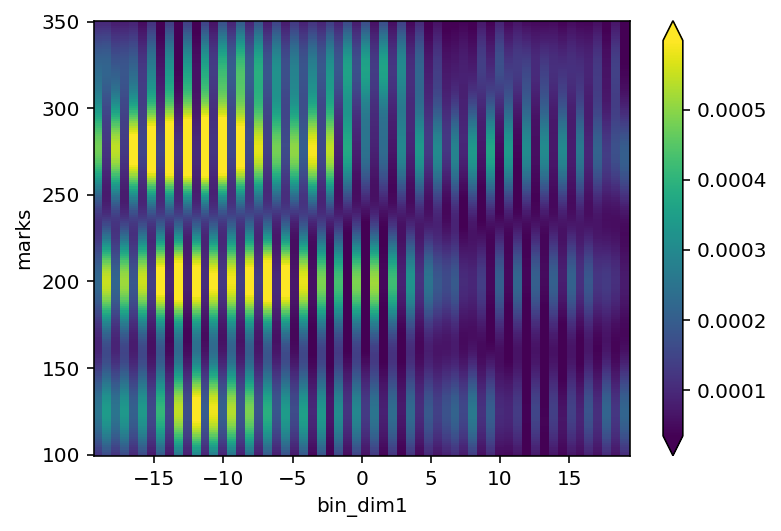

In [55]:
d.plot_observation_model()

In [7]:
mark_means_test = np.array([195, 130, 300, 265])
signal_data = [sim.simulate_multiunit(tuning_curve_means, mark_means_test, stimulus, SAMPLING_FREQUENCY)]

/home/mz/prj/mst-decoder/mst_decoder/simulate.py:74: RuntimeWarning: Mean of empty slice
  return np.nanmean(np.stack(unit, axis=0), axis=0)


In [49]:
mi = d.marginalized_intensities().sum('mark_dimension')

<xarray.DataArray (signal: 1, p_stimulus_bin: 961)>
array([[ 0.000332,  0.000291,  0.000263, ...,  0.000107,  0.000108,  0.000114]])
Coordinates:
    bin_dim0  (p_stimulus_bin) float64 -19.35 -18.06 -16.77 -15.48 -14.19 ...
    bin_dim1  (p_stimulus_bin) float64 -19.35 -19.35 -19.35 -19.35 -19.35 ...
Dimensions without coordinates: signal, p_stimulus_bin

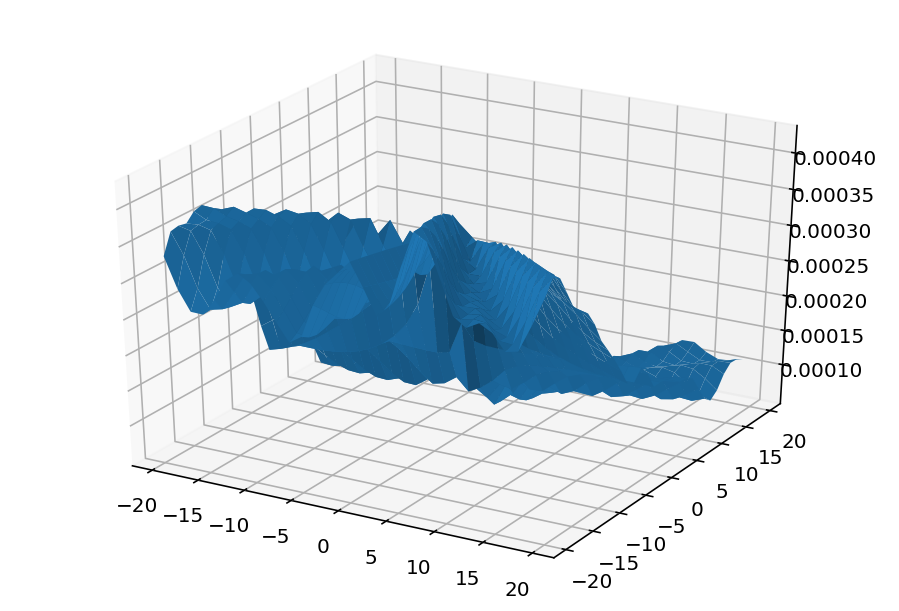

In [63]:
from mpl_toolkits.mplot3d import axes3d, Axes3D

x = d.tuning_bin_grid[:, 0].reshape(31, 31)
y = d.tuning_bin_grid[:, 1].reshape(31, 31)
z = mi.mean('marks').values.reshape(31, 31)

fig = plt.figure()
ax = Axes3D(fig)

ax.plot_surface(x, y, z)

In [65]:
X, Y = np.meshgrid(*[dim_edges[:-1] + np.diff(dim_edges) / 2 for dim_edges in d.tuning_bin_edges])

In [62]:
x.shape

(961,)

In [34]:
res = d.predict(signal_data)

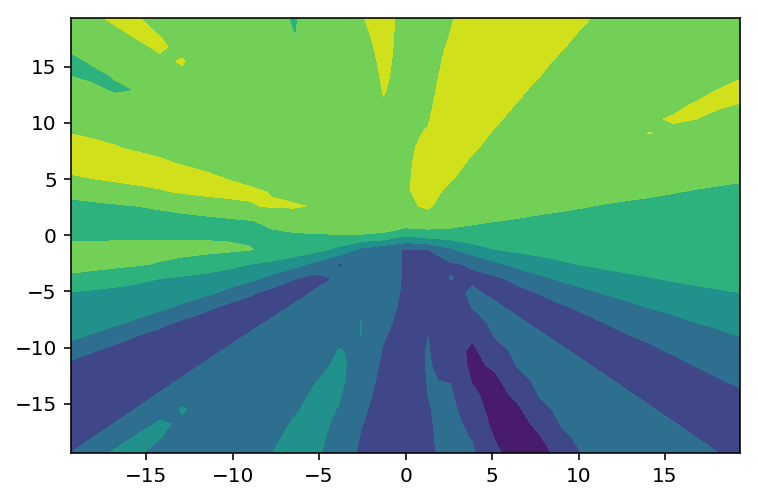

In [48]:
plt.contourf(d.tuning_bin_centers[0], d.tuning_bin_centers[1], 
             res.sel(time=1)['posterior_density'].values.reshape(31, 31))

In [32]:
bin_edges = d.tuning_bin_edges
bin_centers = [dim_edges[:-1] + np.diff(dim_edges) / 2 for dim_edges in bin_edges]

In [20]:
res.sel(time=1)['posterior_density'].values.reshape(31, 31)

array([[ 0.00102402,  0.00102941,  0.00103293,  0.00103283,  0.00102969,
         0.00102584,  0.00102411,  0.00102556,  0.0010285 ,  0.00103194,
         0.00103509,  0.00103348,  0.00102725,  0.00102318,  0.00102076,
         0.00101841,  0.00102244,  0.00102684,  0.00102495,  0.00101782,
         0.00101164,  0.00101288,  0.00101884,  0.00102488,  0.00102646,
         0.00102519,  0.00102637,  0.00102927,  0.00102881,  0.00102402,
         0.00101867],
       [ 0.00102032,  0.00102417,  0.00102956,  0.00103284,  0.00103216,
         0.00102854,  0.00102504,  0.00102454,  0.00102699,  0.0010304 ,
         0.00103413,  0.00103437,  0.00102866,  0.00102363,  0.00102094,
         0.00101868,  0.00102286,  0.00102673,  0.00102358,  0.00101566,
         0.00101156,  0.00101525,  0.00102206,  0.00102617,  0.00102566,
         0.00102587,  0.00102857,  0.0010288 ,  0.00102436,  0.00101891,
         0.00101602],
       [ 0.00101994,  0.00102052,  0.00102433,  0.00102971,  0.00103267,
       